In [52]:
#Import libraries for plotting graphs and GUI
from tkinter import *
from datetime import datetime
import pandas_datareader as web
import mplfinance
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from PIL import ImageTk, Image

In [53]:
# Import required libraries

# Reading Dataset
import pandas as pd

# Numeric Calculations
import numpy as np

# Graphing
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Regression and Line Fitting
from sklearn.model_selection import train_test_split as sampler
from sklearn.linear_model import LinearRegression

In [54]:
#Reading CSV file
df = pd.read_csv("GDP_dataset.csv")

#Setting year as index
df.set_index("Year", inplace=True)
df[:] = df[:].astype(float)

header = list(df.keys())

# Independent Variables
var = header[1:]

# Dependent Variable
gdp = header[0]

# Train Test Data
train_size = 0.7
sample, test, gdp_sample, gdp_test = sampler(df[var], df[gdp], train_size=train_size)

In [55]:
#Finding correlation between "GDP" and independent variable
corelation = df.corr()[gdp][var]

In [56]:
def corelation_bar_graph():
    fig = plt.figure(figsize=(9,6.2),dpi=100)
#     rmslbl.place_forget()
    plt.title("Correlation of Dependent ({:s}) vs Independent Variables".format(gdp))
    plt.bar(var, list(corelation))
    plt.xticks(rotation=45)
    canvas = FigureCanvasTkAgg(fig)
    canvas.draw()
    canvas.get_tk_widget().place(x=500,y=200)

In [57]:
def regression_graph():
    v=var_selected.get()
#     rmslbl.place_forget()
    fig = plt.figure(figsize=(9,6.2),dpi=100)
    plt.title("Regression line of Dependent ({:s}) vs Independent ({:s}) Variable".format(gdp, v))
    sns.regplot(x=df[v], y=df[gdp], color='r')
    canvas = FigureCanvasTkAgg(fig)
    canvas.draw()
    canvas.get_tk_widget().place(x=500,y=200)

In [58]:
def sample_graph():
    fig = plt.figure(figsize=(9,6.2),dpi=100)
#     rmslbl.place_forget()
    plt.title("Sample")
    plt.scatter(sample.index, gdp_sample, label="Sample", color='y')
    plt.plot(df.index, df[gdp], label="Dataset")
    plt.legend(loc=0)
    canvas = FigureCanvasTkAgg(fig)
    canvas.draw()
    canvas.get_tk_widget().place(x=500,y=200)

In [59]:
model = LinearRegression().fit(sample, gdp_sample)
gdp_pred = model.predict(test)
rms_value = round(100*model.score(test, gdp_test),6)

In [60]:
def prediction_graph():
    fig = plt.figure(figsize=(9,6.2),dpi=100)
    plt.title("Prediction")
    plt.scatter(sample.index, gdp_sample, label="Sample", color='y')
    plt.plot(df.index, df[gdp], label="Dataset")
    plt.scatter(test.index, gdp_pred, label="Prediction", color='r')
    plt.legend(loc=0)
    canvas = FigureCanvasTkAgg(fig)
    canvas.draw()
    canvas.get_tk_widget().place(x=500,y=200)
#     rmslbl.place(y=750,x=800)

In [61]:
screen = Tk()
screen.title('2CS404 Innovative Assignment')
screen.geometry("1536x864")

''

In [62]:
def rmslblPopup():
    popup = Toplevel(screen)
    popup.geometry("500x300")
    popup.title('R2SCORE')
    rmslbl = Label(popup,text='R2 Score ='+str(rms_value), font=("Times New Roman", 20))
    rmslbl.place(y=130,x=120)

In [63]:
screen_width=screen.winfo_screenwidth()
screen_height=screen.winfo_screenheight()

In [64]:
canvas = Canvas(screen,width=screen_width,height=screen_height)
canvas.create_line(350,screen_height,350,180)
canvas.create_line(353,screen_height,353,180)
canvas.create_line(0,180,screen_width,180)
canvas.create_line(0,183,screen_width,183)
canvas.create_line(0,400,350,400)
canvas.create_line(0,600,350,600)
canvas.pack(fill=BOTH)

In [65]:
#Widgets for crypto
def draw_chart():
    try:
        startdate=startentry.get()
        startdate=datetime.strptime(startdate,"%d/%m/%y")
        enddate=toentry.get()
        enddate=datetime.strptime(enddate,"%d/%m/%y")
        cname = coin.get()
        crypto_currency='BTC'
        if cname == 'BITCOIN':
            crypto_currency='BTC'
        elif cname == 'ETHER':
            crypto_currency='ETH'
        elif cname == 'DogeCoin':
            crypto_currency='DOGE'
        data = web.DataReader(f'{crypto_currency}-{"USD"}','yahoo',startdate,enddate)
        fig, ax = mplfinance.plot(data, type='candle',volume=True, style='yahoo', returnfig=True, figsize=(9,6.2))
        canvas = FigureCanvasTkAgg(fig)
        canvas.draw()
        canvas.get_tk_widget().place(x=500,y=200)
    except:
        popup = Toplevel(screen)
        popup.geometry("500x300")
        popup.title('Error Window')
        errlbl = Label(popup,text="Incorrect Date entered",font=("Times New Roman", 20))
        errlbl.pack()

In [66]:
global startlabel,tolabel,start,entry,toentry,rmsbtn
startlabel=Label(screen,text='From Date', width=10, font=("Times New Roman", 20))
tolabel=Label(screen,text='To Date', width=10, font=("Times New Roman", 20))
startentry=Entry(screen, width=12, font=("Times New Roman", 20))
toentry=Entry(screen, width=12, font=("Times New Roman", 20))
crypto_options = [
    "BITCOIN",
    "ETHER",
    "DogeCoin"
]
coin = StringVar()
coin.set( "BITCOIN" )
crypto_drop = OptionMenu(screen , coin, *crypto_options)
crypto_drop.config(font=("Times New Roman", 20), width=20)
crysbt=Button(text='Draw Chart', command=draw_chart, font=("Times New Roman", 20))


crlnbtn=Button(text='Correlation Graph', command=corelation_bar_graph, font=("Times New Roman", 20))
variables_options = [
    "Imports",
    "Trade",
    "Net income from abroad",
    "Inflation",
    "Tax revenue",
    "FDI",
    "CO2 emissions",
    "International Taxes"
]
var_selected = StringVar()
var_selected.set("Imports")
variables_drop = OptionMenu(screen, var_selected, *variables_options)
variables_drop.config(font=("Times New Roman", 20))
variables_drop.config(width=20)
plot=Button(text='Plot', command=regression_graph, font=("Times New Roman", 20))
samplebtn=Button(text='Sample vs Actual',command=sample_graph, font=("Times New Roman", 20))
predbtn=Button(text='Prediction vs Actual',command=prediction_graph, font=("Times New Roman", 20))
rmsbtn=Button(text='R2 Score', command=rmslblPopup, font=('Times New Roman',20))

def gdp_options():
    startlabel.place_forget()
    tolabel.place_forget()
    startentry.place_forget()
    toentry.place_forget()
    crypto_drop.place_forget()
    crysbt.place_forget()
    crlnbtn.place(x=50,y=250)
    variables_drop.place(x=10,y=450)
    plot.place(x=130,y=520)
    samplebtn.place(x=68,y=630)
    predbtn.place(x=50,y=690)
    rmsbtn.place(x=105,y=755)

def crypto_options():
    rmsbtn.place_forget()
    startlabel.place(x=5,y=250)
    startentry.place(x=160,y=250)
    tolabel.place(x=5,y=300)
    toentry.place(x=160,y=300)
    crypto_drop.place(x=13,y=480)
    crysbt.place(x=100,y=700)
    crlnbtn.place_forget()
    variables_drop.place_forget()
    plot.place_forget()
    samplebtn.place_forget()
    predbtn.place_forget()

In [67]:
gdpbtn=Button(screen,text="GDP",command=gdp_options, font=("Times New Roman", 20))
cryptobtn=Button(screen,text='Crypto',command=crypto_options, font=("Times New Roman", 20))

gdpbtn.place(x=400,y=90)
cryptobtn.place(x=900,y=90)

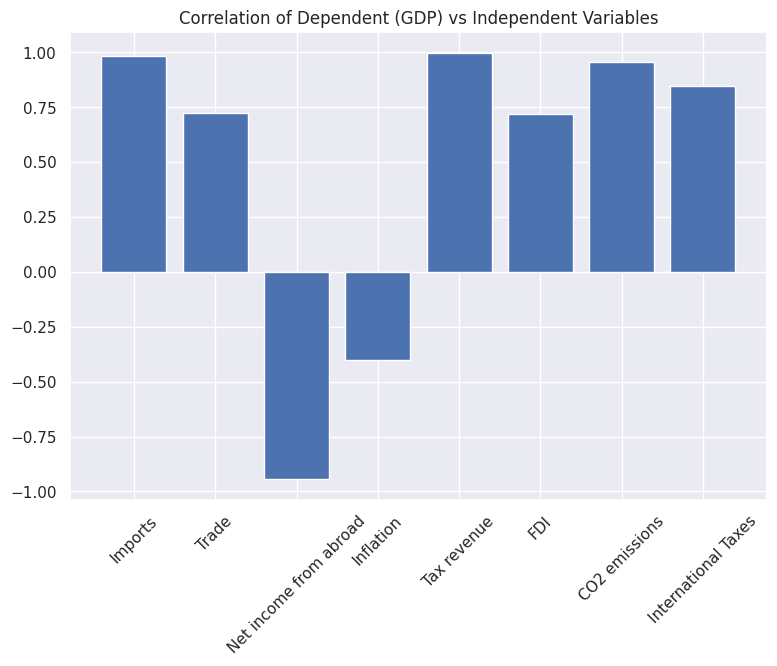

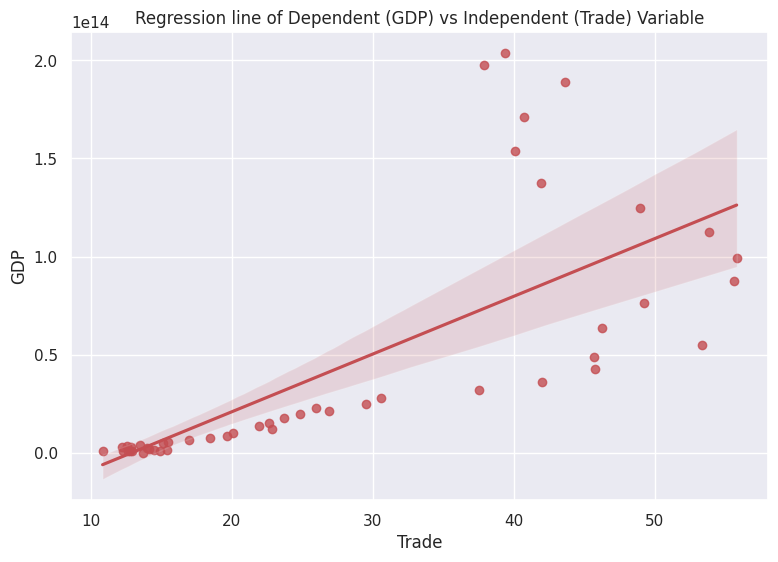

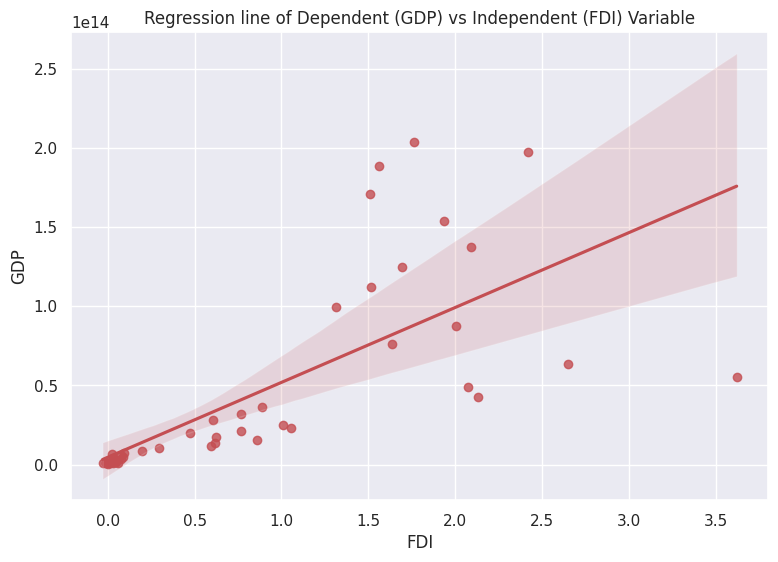

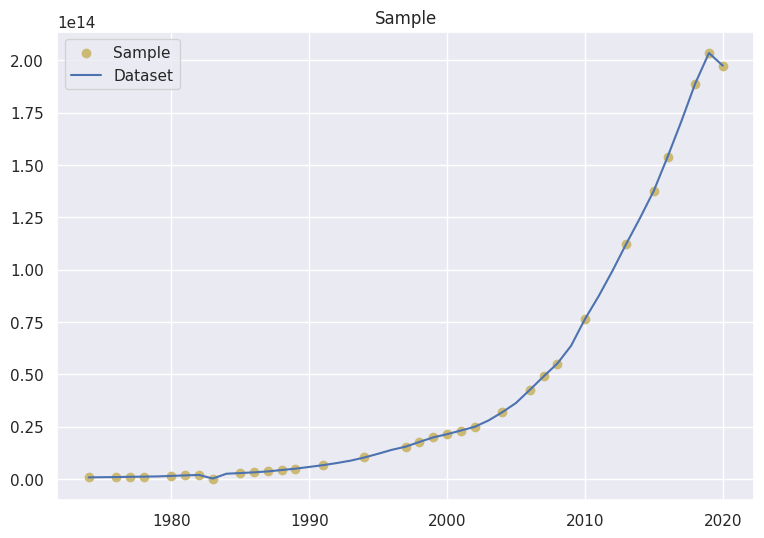

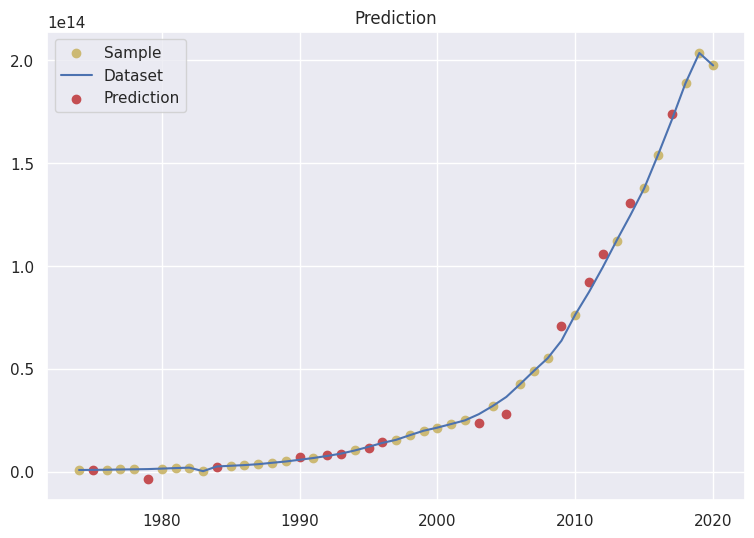

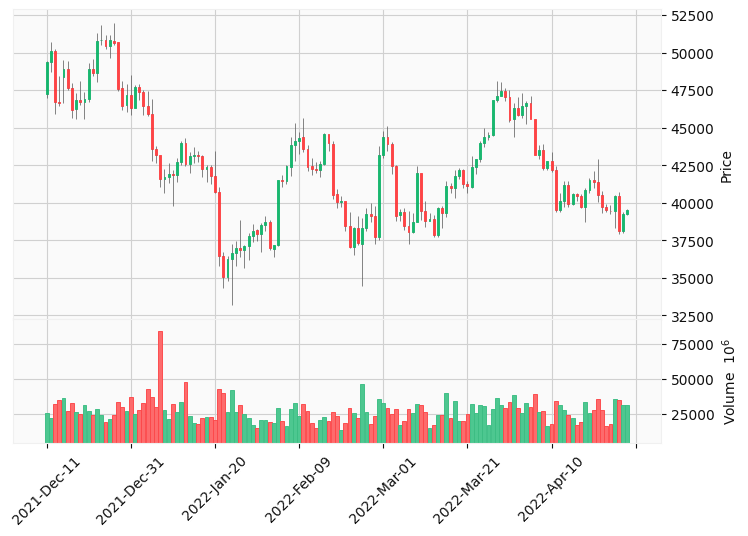

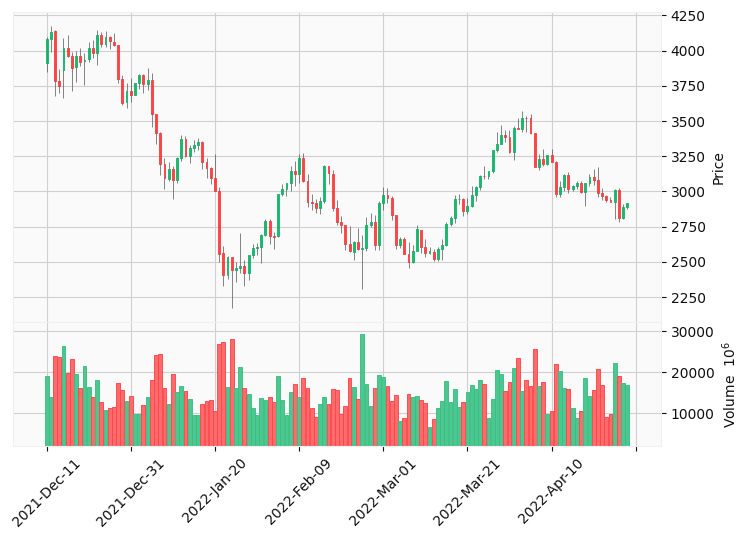

In [68]:
mainloop()